In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.integrate import simps
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_theme()

In [2]:
# Give fomat to the data save it in results 
def format_data(path_to_data,dir_to_save):
    dirname, basename = os.path.split(path_to_data)
    with open(dir_to_save+"new"+basename, 'w') as newdata:
        with open(path_to_data, 'r') as oldfile:
            data=oldfile.read()
            k=0
            line=0
            limits=[]
            for i in data:
                if i=="(":
                    m=k+1
                    while data[m]!=",":
                        newdata.write(data[m])
                        m+=1
                    m+=1
                    newdata.write(" ")
                    while data[m]!=")":
                        newdata.write(data[m])
                        m+=1
                    newdata.write("\n")
                    k+=1
                    line+=1
                elif i=="F":
                    limits.append(line)
                    k+=1
                else:
                    k+=1
            limits=np.unique(np.array(limits))
    return limits 
# Divide the different data in different arrays 
def divide_data(path_to_data,dir_to_save):
    print(path_to_data)
    dirname, basename = os.path.split(path_to_data)
    limits=format_data(path_to_data,dir_to_save)
    data=np.loadtxt(dir_to_save+"new"+basename)
    FID_RE=data[limits[0]:limits[1],:]
    FID_IM_1=data[limits[1]:limits[2],:]
    FID_IM_2=data[limits[2]:limits[3],:]
    FFT_RE=data[limits[3]:limits[4],:]
    FFT_IM=data[limits[4]:limits[5],:]
    FFT_MOD=data[limits[5]:limits[6],:]
    FFT_FIT=data[limits[6]:,:]
    
    return FID_RE, FID_IM_1, FID_IM_2, FFT_RE, FFT_IM, FFT_MOD, FFT_FIT
# Plot data
def give_plot(name_of_plot,t=0,time=0, separate=True):
    if separate:
        print("Time=",t)
        x,y=name_of_plot.T
        return plt.plot(x,y)
    
    else:
        x=time
        y=name_of_plot
        return sns.relplot(x=x,y=y, label="Experimental T1 Relaxation T1=7.5s")

        
# Get data divided in specific times 
def data_from_time(time, T="T2", qubit="H"):
    
    FIDR=[]
    FIDI_1=[]
    FIDI_2=[]
    FFTR=[]
    FFTIM=[]
    FFTMOD=[]
    FFTFIT=[]

    for t in time:
        FID_RE, FID_IM_1, FID_IM_2, FFT_RE, FFT_IM, FFT_MOD, FFT_FIT=divide_data(f"data/{T}/{qubit}/{str(t)}.txt","results/")
        FIDR.append(FID_RE)
        FIDI_1.append(FID_IM_1)
        FIDI_2.append(FID_IM_2)
        FFTR.append(FFT_RE)
        FFTIM.append(FFT_IM)
        FFTMOD.append(FFT_MOD)
        FFTFIT.append(FFT_FIT)

    return     FIDR, FIDI_1, FIDI_2, FFTR, FFTIM, FFTMOD, FFTFIT


def Time(T="T2", qubit="H"):
    path=f"data/{T}/{qubit}"
    time=[]
    for filename in os.listdir(path):
        k=0
        x=[]
        for letter in filename:
            if letter!=".":
                if k==0:
                    x.append(letter)
                    k+=1
                else:
                    x[0]+=letter
            else:
                break
        x=np.array(x)
        x=x.astype(np.int)
        time.append(x[0])
    time=np.array(time)
    time=sorted(time)
    return time    

# Calculate area under the curve
def area_under_curve(FFT_RE,T="T2", qubit="H"):

    if qubit=="H":
        x1_index=[3605,3659]
        x2_index=[3890,3932]
    else:
#         x1_index=[3769,3851]
#         x2_index=[4117,4179]    

        x1_index=[7865,8029]
        x2_index=[8357,8562]    

    x_1, first_peak  =FFT_RE[x1_index[0]:x1_index[1]].T
    x_2, second_peak =FFT_RE[x2_index[0]:x2_index[1]].T
    first_peak=np.absolute(first_peak)
    print(x2_index[0],x2_index[1])
    second_peak=np.absolute(second_peak)
    area_1=simps(first_peak, x_1)
    area_2 = simps(second_peak, x_2)
    return area_1, area_2

    

In [3]:
os.chdir("C:/Users/japul/source/repos/NMRI/NMRI")

# Do you want to process T_2 make want_T_2 True make it False otherwise
want_T_2=False
# Choose the qubit you want to analyze

working_qubit="P"

if want_T_2:
    T_N="T2"
else:
    T_N="T1"

time=Time(T=T_N, qubit=working_qubit)

print("time", time)
print(f"Loading data for {T_N} and qubit {working_qubit}")

# Import data 
FID_RE, FID_IM_1, FID_IM_2, FFT_RE, FFT_IM, FFT_MOD, FFT_FIT= data_from_time(time, T=T_N, qubit=working_qubit)
FFT_RE=np.array(FFT_RE)

print("Data_loaded")

time [0, 500, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, 40000, 80000, 100000, 400000, 500000, 600000, 800000, 1000000, 1005000, 2000000, 2005000, 3000000, 3005000, 4000000, 4005000]
Loading data for T1 and qubit P
data/T1/P/0.txt
data/T1/P/500.txt
data/T1/P/1000.txt
data/T1/P/2000.txt
data/T1/P/3000.txt
data/T1/P/4000.txt
data/T1/P/5000.txt
data/T1/P/10000.txt
data/T1/P/15000.txt
data/T1/P/20000.txt
data/T1/P/40000.txt
data/T1/P/80000.txt
data/T1/P/100000.txt
data/T1/P/400000.txt
data/T1/P/500000.txt
data/T1/P/600000.txt
data/T1/P/800000.txt
data/T1/P/1000000.txt
data/T1/P/1005000.txt
data/T1/P/2000000.txt
data/T1/P/2005000.txt
data/T1/P/3000000.txt
data/T1/P/3005000.txt
data/T1/P/4000000.txt
data/T1/P/4005000.txt
Data_loaded


8357 8562
8357 8562
time 0 area 1.0
8357 8562
time 500 area 0.9764914865818987
8357 8562
time 1000 area 0.7811827793052942
8357 8562
time 2000 area 1.0333787150150802
8357 8562
time 3000 area 1.066190401036715
8357 8562
time 4000 area 1.012435847572539
8357 8562
time 5000 area 0.9805949993860572
8357 8562
time 10000 area 0.9440870487823179
8357 8562
time 15000 area 0.9782644784292509
8357 8562
time 20000 area 0.9076702860142496
8357 8562
time 40000 area 0.941972055539389
8357 8562
time 80000 area 0.8920751598305178
8357 8562
time 100000 area 0.987832964930141
8357 8562
time 400000 area 0.8976493703914528
8357 8562
time 500000 area 0.9065570934179925
8357 8562
time 600000 area 0.8742849071751531
8357 8562
time 800000 area 0.835638547379334
8357 8562
time 1000000 area 0.7592117634193448
8357 8562
time 1005000 area 0.7839908644006568
8357 8562
time 2000000 area 0.4923954821447771
8357 8562
time 2005000 area 0.5393148984626
8357 8562
time 3000000 area 0.305562423702293
8357 8562
time 30050

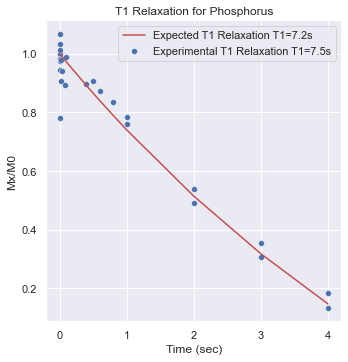

In [4]:
# Fit data and find T1 and T2
def T_1(t,a,T):
    return a*(-(1-2*np.exp(-t*T)))

def T_2(t,a,T):
    return a*(np.exp(-t*T))

time=Time(T=T_N, qubit=working_qubit)

M_x=[]

for i in range(len(time)):
    if want_T_2:
        if i==0:
                area_1, area_2=area_under_curve(FFT_RE[6],T=T_N, qubit=working_qubit)
                M0=area_1+area_2
                area_1, area_2=area_under_curve(FFT_RE[i],T=T_N, qubit=working_qubit)
#                 M0=area_1+area_2
                M_x.append((area_1+area_2)/M0)
                print("time",time[i],"area",(area_1+area_2)/M0)

        else:
            area_1, area_2=area_under_curve(FFT_RE[i],T=T_N, qubit=working_qubit)
            M_x.append((area_1+area_2)/M0)
            print("time",time[i],"area",(area_1+area_2)/M0)
    else:
        if i==0:
                area_1, area_2=area_under_curve(FFT_RE[4],T=T_N, qubit=working_qubit)
        #         M0=area_1+area_2
                area_1, area_2=area_under_curve(FFT_RE[i],T=T_N, qubit=working_qubit)
                M0=area_1+area_2
                M_x.append((area_1+area_2)/M0)
                print("time",time[i],"area",(area_1+area_2)/M0)

        else:
            area_1, area_2=area_under_curve(FFT_RE[i],T=T_N, qubit=working_qubit)
            M_x.append((area_1+area_2)/M0)
            print("time",time[i],"area",(area_1+area_2)/M0)

        
print("Mx",M_x)   

time=np.array(time)/1000000

if want_T_2==True:
    popt, pcov= curve_fit(T_2,time,M_x)
    print("pop",popt)
    M=popt[0]
    T=popt[1]
    T_2=1/T
    print("T_2",T_2)   
    best_function=M*np.exp(-np.array(time)/T_2)
    
    if working_qubit=="H":
        real_function=M*np.exp(-np.array(time)/0.3)

    if working_qubit=="P":
        real_function=np.exp(-np.array(time)/0.5)

    
else: 

    popt, pcov= curve_fit(T_1,time,M_x)
    print("pop",popt)
    M=popt[0]
    T=popt[1]
    T_1=1/T
    print("T_1",T_1) 

    best_function=-M*(1-2*np.exp(-np.array(time)*T))

    if working_qubit=="H":
        real_function=-(1-2*np.exp(-np.array(time)/4))

    if working_qubit=="P":
        real_function=-(1-2*np.exp(-np.array(time)/7.2))

    


Mx_graph=give_plot(M_x,time=time, separate=False)
Mx_graph.set(xlabel='Time (sec)', ylabel='Mx/M0')
plt.plot(time,real_function, 'r', label="Expected T1 Relaxation T1=7.2s")
plt.legend()
plt.title("T1 Relaxation for Phosphorus")
plt.show()
Mx_graph.savefig(f"Images/{T_N}.png", dpi=100)

Time= 0.0005


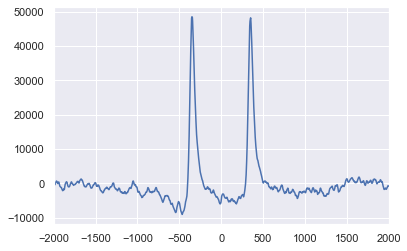

Time= 0.001


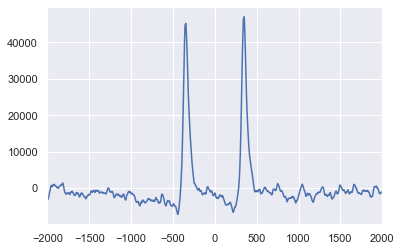

Time= 0.002


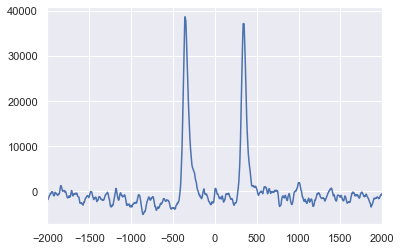

Time= 0.003


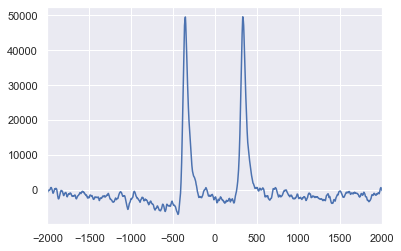

Time= 0.004


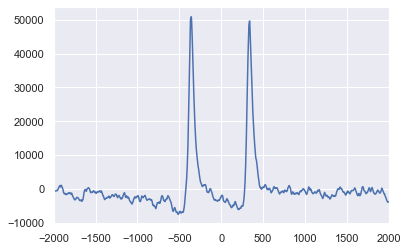

Time= 0.005


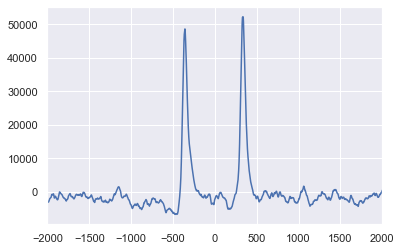

Time= 0.01


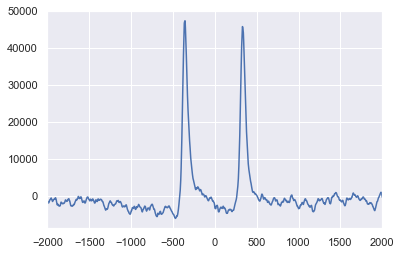

Time= 0.015


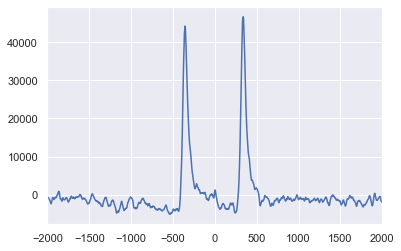

Time= 0.02


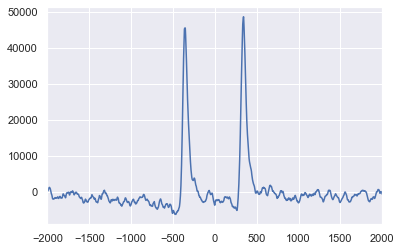

Time= 0.04


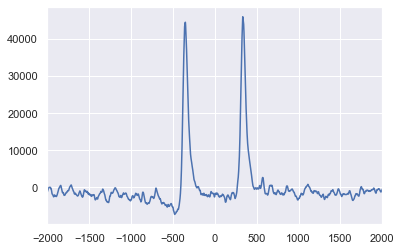

Time= 0.08


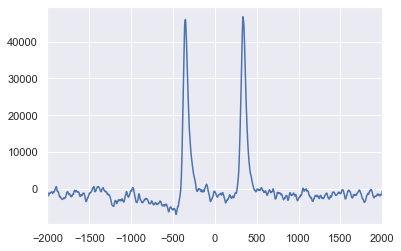

Time= 0.1


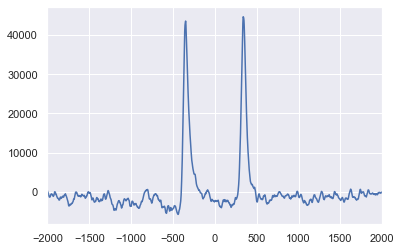

Time= 0.4


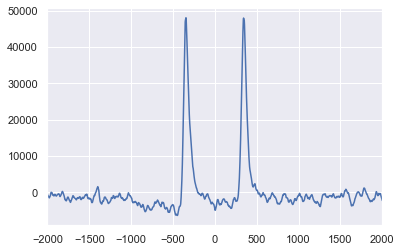

Time= 0.5


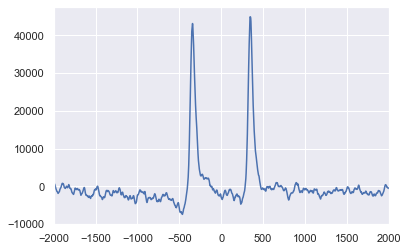

Time= 0.6


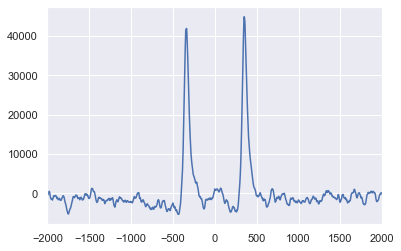

Time= 0.8


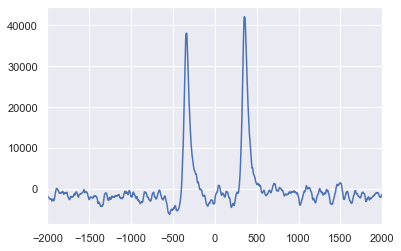

Time= 1.0


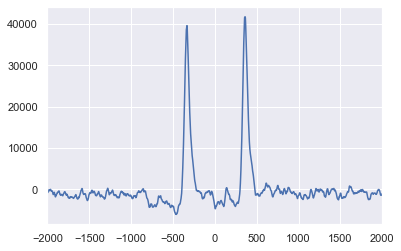

Time= 1.005


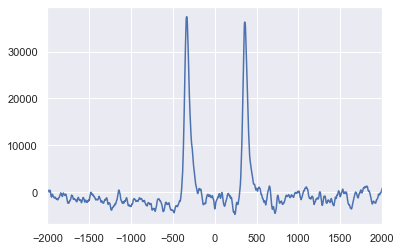

Time= 2.0


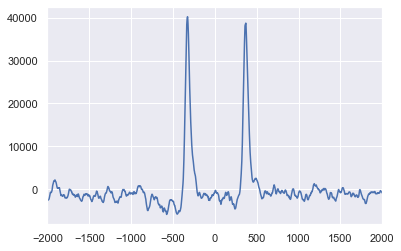

Time= 2.005


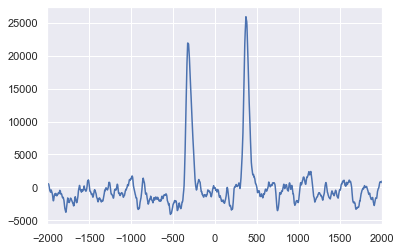

Time= 3.0


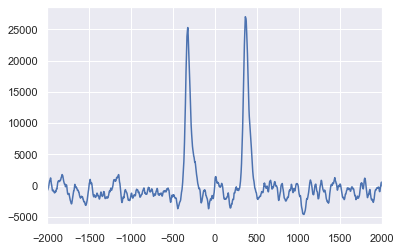

Time= 3.005


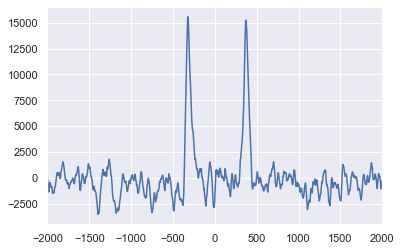

Time= 4.0


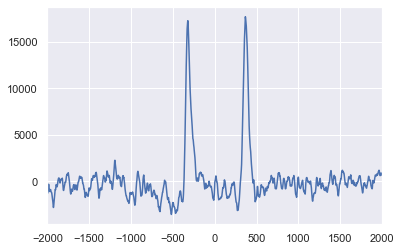

Time= 4.005


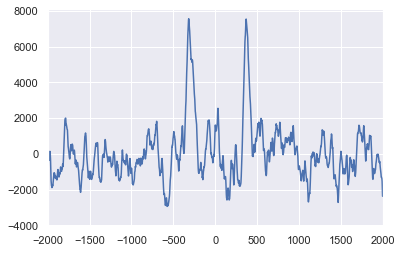

IndexError: index 25 is out of bounds for axis 0 with size 25

In [5]:
# Plot the individual FFT
k=0
for FFT in FFT_RE:

    k+=1
    a=give_plot(FFT,t=time[k],time=0, separate=True)
    plt.xlim(-2000, 2000)
    plt.show()

In [ ]:
# Find which index in the array is associated with a certain number in the x axis

k=0
num=[-800,-600,50,200]
def look_for_number(num):
    k=0
    for data in FFT_RE[0]:
        if (int(data[0])>num):
            break
        k+=1
    print(k, FFT_RE[0][k])
    return k

for n in num:
    look_for_number(n)
    

In [ ]:
# Find the peak of a FFT
x,y=FFT_RE.T
print(x)
print(y)
a=(abs(y)>20000).nonzero()
print("a",a[0][:])

for i in a[0][:]:
    print(x[i], y[i])
print("x",m)
print(a[0][0])
    
peaks,_=find_peaks(y, height=20000)
print(peaks)

In [ ]:
with open("newdata.txt", 'w') as newdata:
    with open("C:/Users/japul/Downloads/test_1.txt", 'r') as oldfile:
        data=oldfile.read()
        k=0
        line=0
        limits=[]
        for i in data:
            if i=="(":
                m=k+1
                while data[m]!=",":
                    newdata.write(data[m])
                    m+=1
                m+=1
                newdata.write(" ")
                while data[m]!=")":
                    newdata.write(data[m])
                    m+=1
                newdata.write("\n")
                k+=1
                line+=1
            elif i=="F":
                print(i+data[k+1]+data[k+2]+data[k+3]+data[k+4]+data[k+5]+data[k+6]+data[k+7])
                limits.append(line)
                print(line)
                k+=1
            else:
                k+=1
        limits=np.unique(np.array(limits))
print(limits)

data=np.loadtxt("C:/Users/japul/Downloads/newtest_1.txt")
print(data[0:3,:])